Quick Intro to Network Automation
amit.singh@pluribusnetworks.com

Parsing MAC OUI from MAC Address in Python

How many devices of a specific vendor exists in your network?

In [1]:
import re
macoui = """06:b0:00:05:30:10 15   5     
06:b0:00:09:f0:14 15   5     
54:7f:ee:20:5c:ae 15   5     
64:0e:94:28:00:de 15   5     
64:0e:94:2c:00:c8 25   5     
64:0e:94:2c:01:91 15   5     """

In [2]:
macoui1 = []
macoui1 = macoui.split("\n")
i = 0
#while True:
print "-" * 40
a = []
for line in macoui1:
    #print line.split()
    macadd, vlan, pport = line.split()
    macadd1 = []
    macadd1 =  re.findall('........', macadd)
    #print macadd1[0]
    macad2 = macadd1[0]
    if macad2 == "64:0e:94": 
       i = i+1
       a.append(vlan)
       print vlan

----------------------------------------
15
25
15


In [3]:
a = list(set(a))        
print i, "Pluribus devices present in the network in vlans", a

3 Pluribus devices present in the network in vlans ['25', '15']


Parsing LLDP Output in Python

Find MAC Address associated to a specific VM Name

In [24]:
lldpout = """chassis-id        sys-name   local-port port-vlan-id
----------------- ---------- ---------- ------------
0a000292          Leaf2      18         0
0a0001ca          Leaf1      23         0
0a000292          Leaf2      24         0
0a0001ca          Leaf1      31         0
0a000106          pn-dev03   59         0
0e00000d          BGP-WAN    60         0
0a0001ca          Leaf1      61         0
0e00000d          BGP-WAN    62         0
0a0001cd          F64LSpine1 18         0
0a0001cd          F64LSpine1 24         0
0a0001ca          Leaf1      36         0
00:50:56:95:26:64 amitsivm2  46         0
00:50:56:95:11:27 amitsivm3  46         0
0a0001ca          Leaf1      49         0
00:12:c0:80:3c:03 amitsi3    55         0
0a0001ca          Leaf1      18         0
0a0001ca          Leaf1      24         0
0a0001ca          Leaf1      51         0
0c000197          Leaf2      53         0
0e00000d          BGP-WAN    60         0
0e00000d          BGP-WAN    62         0
0a000287          F64LSpine2 18         0
0a0001cd          F64LSpine1 23         0
0a000287          F64LSpine2 24         0
0a0001cd          F64LSpine1 31         0
0a000292          Leaf2      36         0
00:50:56:95:47:28 amitsivm2  46         0
00:50:56:95:00:fa amitsivm3  46         0
0a000292          Leaf2      47         0
0a000287          F64LSpine2 51         0
0a0001cd          F64LSpine1 61         0
00:12:c0:80:3c:02 amitsi3    64         0          """

In [25]:
lldpout1 = []
lldpout1 = lldpout.split("\n")

In [29]:
print "#" * 40
for entry in lldpout1:
    #print entry.split()
    macadd, sysname, lport, pvlanid = entry.split()
    #    print macadd
    if sysname == "amitsi3":
        print ("The MAC Address of the VM is: " + macadd)

########################################
The MAC Address of the VM is: 00:12:c0:80:3c:03
The MAC Address of the VM is: 00:12:c0:80:3c:02


Parsing VLAN output in Python

Find out ports where a particular VLAN is allowed

In [27]:
vlanshow = """ id   untagged-ports              ports
             ---- --------------------------- ---------------------------
             1    1-58,60-72,128-130,255      1-58,60-72,128-130,255
             1    1-72,128-129,255            1-72,128-129,255
             1    1-45,47-61,63,65-72,128-129 1-45,47-61,63,65-72,128-129
             1    1-45,47-54,56-61,63-72,128  1-45,47-54,56-61,63-72,128
             101  none                        1-72,128-130,255
             101  none                        1-72,128-129,255
             101  64                          1-72,128-129
             101  55                          1-72,128
             102  none                        1-72,128-130,255
             102  none                        1-72,128-129,255
             102  62                          1-72,128-129
             102  62                          1-72,128
             103  none                        1-72,128-130,255
             103  none                        1-72,128-129,255
             103  46                          1-72,128-129
             103  46                          1-72,128
             110  59                          1-72,128-130,255
             110  none                        1-72,128-129,255
             110  none                        1-72,128-129
             110  none                        1-72,128
             2017 none                        1-72,128-130,255
             2017 none                        1-72,128-129,255
             2017 none                        1-72,128-129
             2017 none                        1-72,128
             2019 none                        39,65-72,255
             2019 none                        65-72,255
             2019 none                        65-72
             2019 none                        65-72                       """


In [28]:
vlanshow1 = []
vlanshow1 = vlanshow.split("\n")
for line in vlanshow1:
    #print line.split()
    vlan, tagged, untagged = line.split()
    if vlan == "110":
        print "VLAN", vlan, "Has these tagged ports", tagged, "and these untagged", untagged

VLAN 110 Has these tagged ports 59 and these untagged 1-72,128-130,255
VLAN 110 Has these tagged ports none and these untagged 1-72,128-129,255
VLAN 110 Has these tagged ports none and these untagged 1-72,128-129
VLAN 110 Has these tagged ports none and these untagged 1-72,128


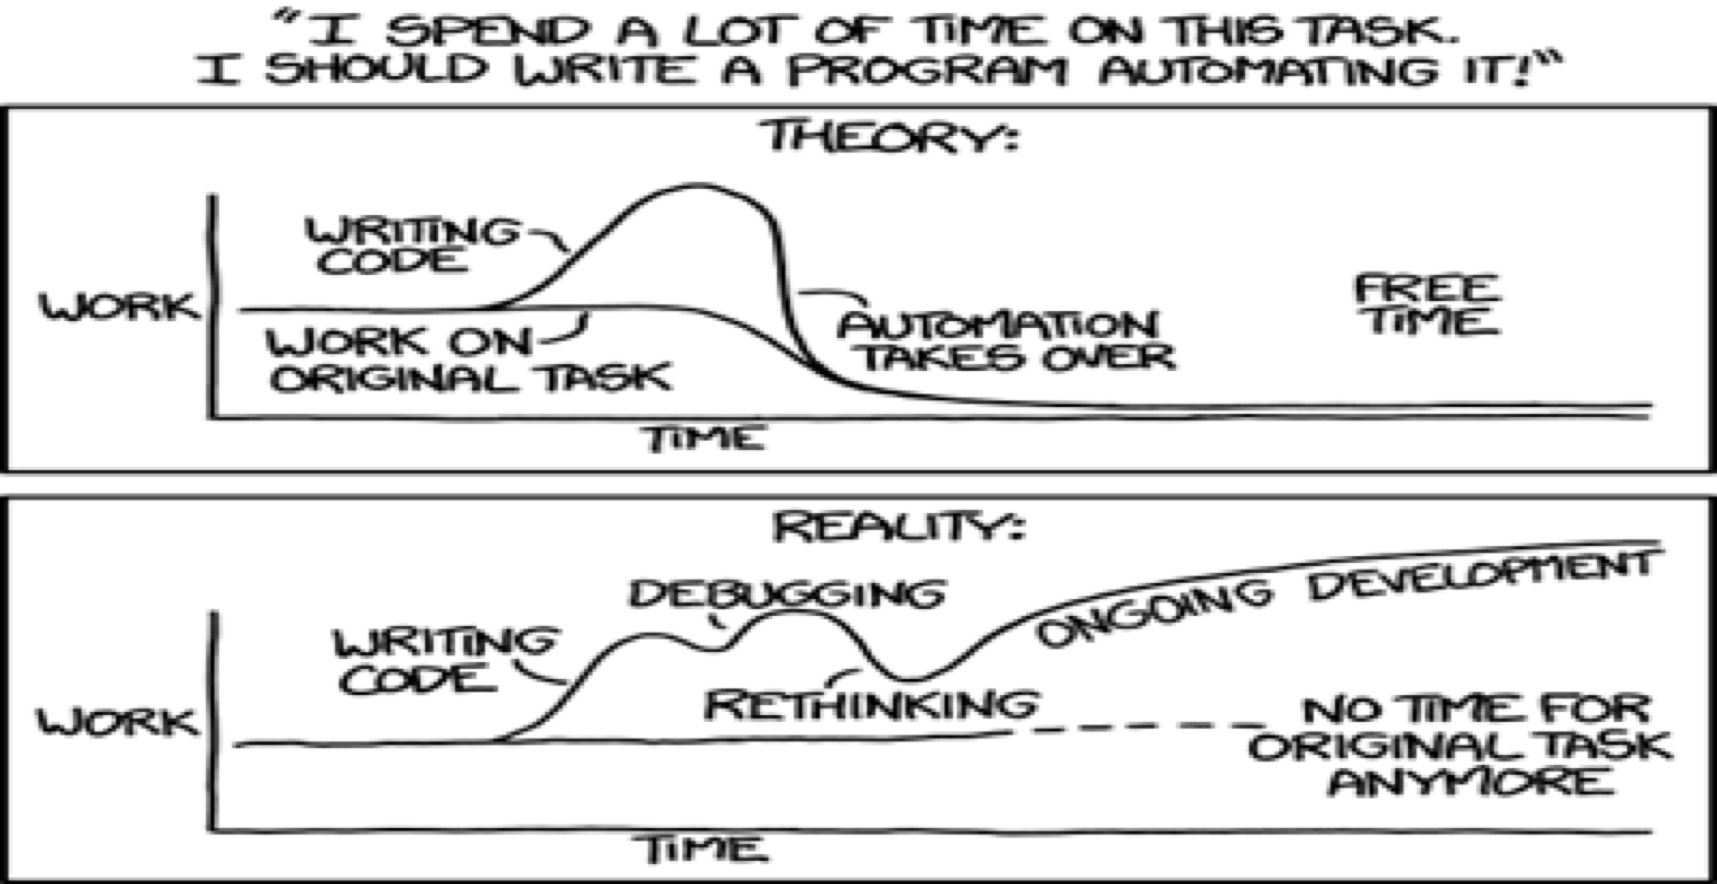

In [5]:
from IPython.display import Image
Image(filename='xkcd.png')